In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/stanfordMOOCForumPostsSet.xlsx', sheet_name= 'Sheet1', names = ['Text', 'Opinion', 'Question', 'Answer', 'Sentiment', 'Confusion', 'Urgency', 'CourseType', 'forum_post_id', 'course_display_name', 'forum_uid', 'created_at', 'post_type', 'anonymous', 'anonymous_to_peers', 'up_count', 'comment_thread_id', 'reads'])
og_data = data

In [ ]:
data.head(20)

,Text,Opinion,Question,Answer,Sentiment,Confusion,Urgency,CourseType,forum_post_id,course_display_name,forum_uid,created_at,post_type,anonymous,anonymous_to_peers,up_count,comment_thread_id,reads
0,Interesting! How often we say those things to ...,1,0,0,6.5,2.0,1.5,Education,5225177f2c501f0a00000015,Education/EDUC115N/How_to_Learn_Math,30CADB93E6DE4711193D7BD05F2AE95C,2013-09-02 22:55:59,Comment,0.0,0.0,0.0,5221a8262cfae31200000001,41.0
1,"What is \Algebra as a Math Game\"" or are you j...",0,1,0,4.0,5.0,3.5,Education,5207d0e9935dfc0e0000005e,Education/EDUC115N/How_to_Learn_Math,37D8FAEE7D0B94B6CFC57D98FD3D0BA5,2013-08-11 17:59:05,Comment,0.0,0.0,0.0,520663839df35b0a00000043,55.0
2,I like the idea of my kids principal who says ...,1,0,0,5.5,3.0,2.5,Education,52052c82d01fec0a00000071,Education/EDUC115N/How_to_Learn_Math,CC11480215042B3EB6E5905EAB13B733,2013-08-09 17:53:06,Comment,0.0,0.0,0.0,51e59415e339d716000001a6,25.0
3,"From their responses, it seems the students re...",1,0,0,6.0,3.0,2.5,Education,5240a45e067ebf1200000008,Education/EDUC115N/How_to_Learn_Math,C717F838D10E8256D7C88B33C43623F1,2013-09-23 20:28:14,CommentThread,0.0,0.0,0.0,None,0.0
4,"The boys loved math, because \there is freedom...",1,0,0,7.0,2.0,3.0,Education,5212c5e2dd10251500000062,Education/EDUC115N/How_to_Learn_Math,F83887D68EA48964687C6441782CDD0E,2013-08-20 01:26:58,CommentThread,0.0,0.0,0.0,None,3.0
5,"the pervasive idea that to be good at Math, is...",1,0,0,3.0,3.5,3.0,Education,521fd16a8b435d1200000010,Education/EDUC115N/How_to_Learn_Math,03300F7CF4CF6B5EBC88CC998ABC3824,2013-08-29 22:55:38,CommentThread,0.0,0.0,1.0,None,3.0
6,The Peer Review module is not fully set up yet...,1,0,1,4.0,1.5,3.0,Education,51e53d18e339d7120000002f,Education/EDUC115N/How_to_Learn_Math,BB6D15555695EB1810A58D3F36FC0A01,2013-07-16 12:31:20,Comment,0.0,0.0,0.0,51e4f3f22862790a000004cd,362.0
7,I would like to start the year off by sharing ...,1,0,0,4.5,3.0,3.0,Education,51e9a19d626eff0e00000075,Education/EDUC115N/How_to_Learn_Math,F2268A8AB67242B72D9FB19DC740DDF0,2013-07-19 20:29:17,CommentThread,0.0,0.0,0.0,None,11.0
8,Great ideas. Asking students to illustrate how...,1,0,0,6.5,3.0,3.0,Education,52185b2192bafe1600000003,Education/EDUC115N/How_to_Learn_Math,2537A52F82AF9EDDD75BB849B01CD9F8,2013-08-24 07:05:05,Comment,0.0,0.0,0.0,5218589b92bafe1600000002,8.0
9,I think this falls on the teacher. Someone sp...,1,0,0,5.0,2.0,3.0,Education,51e82854e8a51212000000af,Education/EDUC115N/How_to_Learn_Math,D8FF02712FD0493D607B06A36F82494E,2013-07-18 17:39:32,Comment,0.0,0.0,0.0,51e74f7de8a5120e0000001f,20.0


Number of unique users

List of users (top 5) that post most often

From these top 5, overtime (looking at date and time) do they become more confused. Can you graph their experiences?

Identify question and answer pairs (match a question posted with its answer)

Mostly questions or answers posted?





# Exploratory Data Analysis

## Distribution of post types

In [ ]:
opinions, questions, answers = data.Opinion, data.Question, data.Answer

In [ ]:
distributing_unique_posts = []
for i in range(len(opinions)):
  if opinions[i] and not questions[i] and not answers[i]:
    distributing_unique_posts.append('Opinion')
  elif answers[i] and not questions[i] and not opinions[i]:
    distributing_unique_posts.append('Answer')
  elif questions[i] and not answers[i] and not opinions[i]:
    distributing_unique_posts.append('Question')
  else:
    distributing_unique_posts.append('Mixed')

In [ ]:
pd.Series(distributing_unique_posts).value_counts()

Opinion     13299
Mixed        7985
Question     4406
Answer       3914
dtype: int64

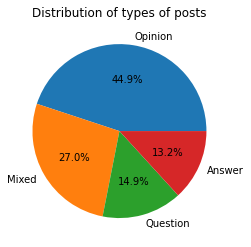

In [ ]:
plt.pie(pd.Series(distributing_unique_posts).value_counts(), labels = ['Opinion', 'Mixed', 'Question', 'Answer'], autopct='%1.1f%%')
plt.title('Distribution of types of posts')
plt.show()

Are most questions in already created threads or are they student taking iniative to post a comment (a new post)?

In [ ]:

# df is called data
df = data.copy()

#column_names = data.columns
only_questions = df[df['Question'] == 1]

og_posted_questions = only_questions[only_questions['post_type'] == 'CommentThread'] # og
num_og_posts = og_posted_questions.shape[0]

def text_to_post_id(post_text):
  matched = og_posted_questions[og_posted_questions["Text"] == post_text]
  id = matched["forum_post_id"].iloc[0]
  return id

def text_to_uid(post_text):
  matched = og_posted_questions[og_posted_questions["Text"] == post_text]
  author = matched["forum_uid"].iloc[0]
  return author

# given text of an OG post, find every instance of thread response (they all have same value for forum_post_id)
def get_thread_responses(post_text):
  # go through all rows in df and if its comment_thread_id is same as the OG post ID, then it is IN the Thread!!
  og_post_id = text_to_post_id(post_text)
  df_threaded_comments = df[df["comment_thread_id"] == og_post_id ]
  return df_threaded_comments

def build_responses_tuples(df_threaded_comments):
  tuples_list = []
  for index, row in df_threaded_comments.iterrows():
    text = row['Text']
    uid = row['forum_uid']
    #print(text)
    row_data = (text, uid) # for given row for a comment, stores its text and the user ID
    tuples_list.append(row_data)
  return tuples_list

# map every posted question to its answer (all responses in thread, can include more questions)
dict_qa = {}

# get key: the question from OG post
texts = og_posted_questions['Text']

for post_text in texts:
  # key should be tuple of (text of question, UID of OG poster)
  #print("Post ID: ", text_to_post_id(post_text))
  df_threaded_comments = get_thread_responses(post_text)
  # if there exists a thread (someone responded to the OG post)
  if(len(df_threaded_comments) != 0):
    list_of_responses = build_responses_tuples(df_threaded_comments)
    # get value: a list of text responses and the uid of the response [ (response text, uid)]
    author = text_to_uid(post_text)
    key = (post_text, author)
    dict_qa[key] = list_of_responses
    # if no responses to OG post, the question does not exist in the dictionary









Built a dictionary that maps every answered OG post to its responses (the thread):

average uids per thread:  2.1975


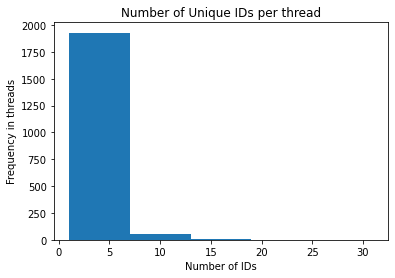

In [ ]:
# Per unique post, how many unique thread commenters?
uids_per_thread = []
for key, tuples in dict_qa.items():
  uid_list = []
  for my_tuple in tuples:
    uid_list.append(my_tuple[1])
  #print("There are ", len(uid_list), " unique users in the thread.")
  uids_per_thread.append(len(uid_list))

average_uids_per_thread = sum(uids_per_thread) / len(uids_per_thread)
print("average uids per thread: ", average_uids_per_thread)
# Graph distribution:

plt.hist(uids_per_thread, bins=5)
plt.xlabel('Number of IDs')
plt.ylabel('Frequency in threads')
plt.title('Number of Unique IDs per thread')
plt.show()

In [ ]:
from collections import Counter
def find_interaction_patterns(tuples, author):
  # find back and forth patterns between OG user and other people in thread
  #uid_interaction_list = [author] #should the interaction include the first OG post? or just the interaction after?? we might overcount author frequency if we count OG post...

  uids_after_posted = []
  for my_tuple in tuples:
    uids_after_posted.append(my_tuple[1])
  print("UID exchange:", uids_after_posted)

  uid_frequency_dict = dict(Counter(uids_after_posted))
  print("Exchange counts: ", uid_frequency_dict)

  graph_friendly_uids = []
  for item in uids_after_posted:
      if item not in uid_frequency_dict:
          uid_frequency_dict[item] = len(uid_frequency_dict) + 1
      graph_friendly_uids.append("User " + str(uid_frequency_dict[item]))

  print(graph_friendly_uids)


  # number of UIDs in thread will define number of columns in df
  unique_OG_Posters = set(uids_after_posted)

  for user in uids_after_posted:
    if user == author:
      print("OG responds in thread, study this data!!")







  # try to graph this back and forth pattern to better understand student-teacher interaction


In [ ]:
# Best way to view dictionary of the threads + their analytics is here:
for key, tuples in dict_qa.items():
    print(f"Question-{key[0]}:\n Answers: {tuples}")
    print("\nnum of unique IDs in exchange w/ author: ", len(tuples))
    og_uid = key[1]
    find_interaction_patterns(tuples, og_uid)
    print("NEXT! \n")

Streaming output truncated to the last 5000 lines.
Question-Hi - _x0007__x0007_I attempted to start the training for peer grading and received this error:_x0007__x0007_Invalid problem id specified: i4x://Medicine/SciWrite/combinedopenended/ba076c1a6e4246f5b767c<zipRedac><zipRedac>60<zipRedac>b27d<zipRedac>9 . Have you made any submissions for that problem? If you haven't, please try making one._x0007__x0007_I'm not sure what to do with this. Thoughts?:
 Answers: [('The issue has been resolved. Can you try again please?_x0007__x0007_Raj', '3CC1D7C4DFDB45A6636246BFED375DA3')]

num of unique IDs in exchange w/ author:  1
UID exchange: ['3CC1D7C4DFDB45A6636246BFED375DA3']
Exchange counts:  {'3CC1D7C4DFDB45A6636246BFED375DA3': 1}
['User 1']
NEXT! 

Question-I am not a native speaker myself and am wondering if we should look past the quality of english of the submissions._x0007_Should we let these affect our grades, e.g. for clarity? I would hope not, unless the level is so low that it gets 

In [ ]:
# Get list of all questions:
questions_list = []
responses_list = []
for key in dict_qa.keys():
  questions_list.append(key[0])
for responses in dict_qa.values():
  responses_list.append(responses[0][0])

data = {'Question': questions_list, 'Answer': responses_list}

#for answer in responses_list:
  #print("\nAnswer: ", answer)

# convert dict to df
df = pd.DataFrame(data)

df.to_csv('questions_mapped_to_answers.csv', index=True)


In [ ]:
# measure student uptake through cosine similarity of answer with OG post

In [ ]:
unique_OG_Posters = only_questions['forum_post_id'].unique() # returns an array of all IDs of users that created a new post asking a question

# find number of back and forth between UID and teacher until question seems to be "resolved"

# get df with all posts with forum_post_id = certain unique_post_id
# among only unique questions posted, look at all comments in the thread and store as its own df

Text(0.5, 1.0, 'Questions being posted by students ("OG Posts") VS questions in the thread ("Thread Comments")')

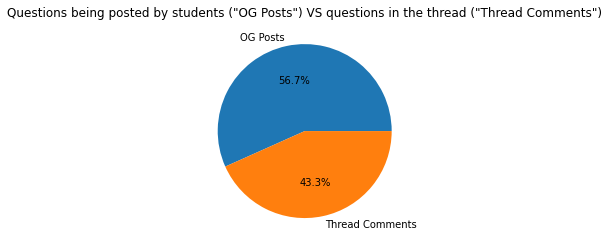

In [ ]:



plt.pie(pd.Series(only_questions.post_type).value_counts(), labels = ['OG Posts', 'Thread Comments'], autopct='%1.1f%%')
plt.title('Questions being posted by students ("OG Posts") VS questions in the thread ("Thread Comments")')
#plt.show()

# attempt to identify teahcer vs student





# Per unique posts, how many interactions (num of thread comments) by the OG after posting -- measuring interaction and try to determine if person responding is teacher...




## Distribution of Course Types

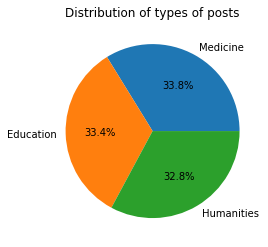

In [ ]:
plt.pie(pd.Series(og_data.CourseType).value_counts(), labels = ['Medicine', 'Education', 'Humanities'], autopct='%1.1f%%')
plt.title('Distribution of types of posts')
plt.show()

## User Analysis

### Top posters

In [ ]:
og_data.forum_uid.value_counts()

0FA78DE09E838CBB5DADAD13460046C7    480
3CC1D7C4DFDB45A6636246BFED375DA3    474
D5C9F784FE5C9CD849B8753F21B148A2    272
CC76B735E6500DAD4051116E534298F2    199
9B89A4D87229DFCC2982FB78DFEA755F    139
                                   ... 
94B0AB965CF81C8681245E861E631E10      1
961A71DC298BD4181C19AE6EF60411C7      1
A7B43883494EF0F2F47A139A368723C9      1
C77A8AC34E4BA2CC9AADF195F64A737B      1
EAF2ABC18AC6E0A1C7619B14A773DE45      1
Name: forum_uid, Length: 11042, dtype: int64

In [ ]:
top_contributors = og_data.forum_uid.value_counts().head(10)
print(top_contributors)

0FA78DE09E838CBB5DADAD13460046C7    480
3CC1D7C4DFDB45A6636246BFED375DA3    474
D5C9F784FE5C9CD849B8753F21B148A2    272
CC76B735E6500DAD4051116E534298F2    199
9B89A4D87229DFCC2982FB78DFEA755F    139
99CC1D510127DE09D2462B601BE6AF2E    139
65A1D8A2220ABD82B005C4A06ED32213    114
462263FAEF5C50A2C34896CB62BF96E1     92
582F35270CADD54ED3784FFFFA6347C6     90
D3E946EF1EA1F704A9074CB5F1A68E8D     86
Name: forum_uid, dtype: int64


<AxesSubplot:>

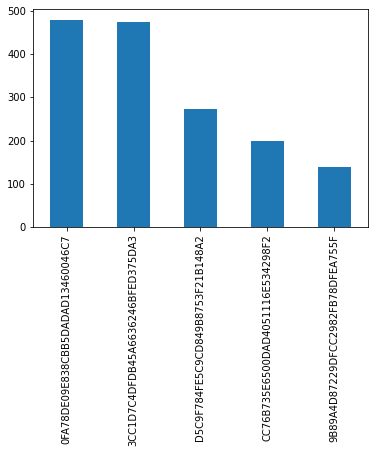

In [ ]:
og_data.forum_uid.value_counts().head(5).plot(kind = 'bar')

### Most Read Posts

In [ ]:
reads_sorted = og_data.loc[:, ['forum_post_id', 'forum_uid', 'reads', 'CourseType']].sort_values(by = 'reads', ascending = False)

In [ ]:
reads_sorted.head(10)

,forum_post_id,forum_uid,reads,CourseType
12148,52e762fa94cae376ff000012,6FE3231F719996A9B6004BFB46DFDE04,9452.0,Humanities
10950,52deee33182f4b0ffc00000e,E8144B6AFC534CB21AC6CECBE7DF10B7,9452.0,Humanities
10965,52def8ae7ebe32d496000007,27D3278B4479E5DA1DA21D8023F70CD1,9452.0,Humanities
17365,532cb4d957eb3589ea00000a,03E82BA9EFAF6DF346F8F5A8FEB6D367,9452.0,Humanities
17302,532a2a6aef2715fa3800001d,AE3CC923F2A71C2E677B2223260C11E7,9452.0,Humanities
10779,52ddea7a53cc4488d7000012,9A70FAD133950F18725AE82826940D27,9452.0,Humanities
14653,52fb9593a78f4fd97200001f,5B12D43302789ECBB8E89CACAAB3800C,9452.0,Humanities
11327,52e1846ae370ef80ca000025,A433FE276F9D685967728E69824A93A0,9452.0,Humanities
17205,53273f488e25f81e5f000006,9B66B57C959B573D06A70998A581D100,9452.0,Humanities
11357,52e1c53ae370ef917900003d,762E2F3DB4B9C958ED289ABFB088E38B,9452.0,Humanities


It seems like the most read posts were not posted by the top contributors, just from a cursory comparison.

Also the top 10 most read posts were in the Humanities. Strange? No idea.

## Exploring questions for top contributors

In [ ]:
minidata = og_data[og_data['forum_uid'].isin(list(top_contributors.index))  & og_data['Question'] == 1]

In [ ]:
minidata.head()

,Text,Opinion,Question,Answer,Sentiment,Confusion,Urgency,CourseType,forum_post_id,course_display_name,forum_uid,created_at,post_type,anonymous,anonymous_to_peers,up_count,comment_thread_id,reads
11106,"Test Set MSE can be decomposed into Bias, Vari...",0,1,0,4.0,4.5,5.0,Humanities,52dfb1967ebe329f22000065,HumanitiesScience/StatLearning/Winter2014,9B89A4D87229DFCC2982FB78DFEA755F,2014-01-22 11:55:02,CommentThread,0.0,0.0,3.0,None,1096.0
11117,The textbook and the lectures have a very spec...,0,1,0,4.0,5.0,4.5,Humanities,52dfd521182f4b0ffc00007c,HumanitiesScience/StatLearning/Winter2014,9B89A4D87229DFCC2982FB78DFEA755F,2014-01-22 14:26:41,CommentThread,0.0,0.0,3.0,None,562.0
11860,"What do you mean by \impossible due dates\""? E...",0,1,0,4.0,4.5,5.0,Humanities,52e5d5d9bfb02e8b1e000017,HumanitiesScience/StatLearning/Winter2014,99CC1D510127DE09D2462B601BE6AF2E,2014-01-27 03:43:21,Comment,0.0,0.0,0.0,52e35e16df09ce81b2000006,1125.0
13217,I need some simple help with linear algebra. W...,0,1,0,4.0,5.0,5.0,Humanities,52ef981eb38179a7b9000040,HumanitiesScience/StatLearning/Winter2014,9B89A4D87229DFCC2982FB78DFEA755F,2014-02-03 13:22:38,CommentThread,0.0,0.0,0.0,None,421.0
13273,Are the diagonal elements of a diagonal covari...,0,1,0,4.0,5.0,5.0,Humanities,52efeda2c91dff0858000070,HumanitiesScience/StatLearning/Winter2014,9B89A4D87229DFCC2982FB78DFEA755F,2014-02-03 19:27:30,Comment,0.0,0.0,0.0,52ef981eb38179a7b9000040,421.0


In [ ]:
grouped_contributor = minidata.groupby('forum_uid').max()
minidata.groupby('forum_uid').max()

,Text,Opinion,Question,Answer,Sentiment,Confusion,Urgency,CourseType,forum_post_id,course_display_name,created_at,post_type,anonymous,anonymous_to_peers,up_count,comment_thread_id,reads
forum_uid,,,,,,,,,,,,,,,,,
0FA78DE09E838CBB5DADAD13460046C7,This one I actually edited with the original s...,1,1,0,4.0,4.0,5.0,Medicine,53d846ede62492c68900004d,Medicine/SciWrite/Fall2013,2014-07-30 01:14:21,Comment,0.0,0.0,2.0,53d830c67c113c5432000059,407.0
3CC1D7C4DFDB45A6636246BFED375DA3,The videos seem fine to me! Can you check them...,0,1,1,4.5,4.5,3.5,Medicine,5271d64c3c1c7332c8000004,Medicine/SciWrite/Fall2013,2013-10-31 04:02:18,Comment,0.0,0.0,0.0,5271b64ec15f3f17f0000002,355.0
462263FAEF5C50A2C34896CB62BF96E1,is there some reason you don't use the `rfe` f...,1,1,0,4.0,5.5,6.0,Humanities,533a09ca59521db1ec00001d,HumanitiesScience/StatLearning/Winter2014,2014-04-01 00:35:22,Comment,0.0,0.0,1.0,5339d98359521db1ec000010,700.0
582F35270CADD54ED3784FFFFA6347C6,"\Yes I got that, which made it clearer...\"" wo...",1,1,1,6.0,4.5,5.0,Medicine,529d705f7d9a7027f6000007,Medicine/SciWrite/Fall2013,2013-12-03 05:47:11,CommentThread,0.0,0.0,6.0,None,480.0
65A1D8A2220ABD82B005C4A06ED32213,What is the browser you are using change to ch...,1,1,0,4.0,5.0,5.5,Medicine,528664a6a322f4eefd000006,Medicine/SciWrite/Fall2013,2013-11-15 18:15:02,CommentThread,0.0,0.0,2.0,None,330.0
99CC1D510127DE09D2462B601BE6AF2E,Who is a Bayesian? I thought he was a Gallifre...,1,1,1,4.0,5.0,6.0,Medicine,52e5d5d9bfb02e8b1e000017,Medicine/HRP258/Statistics_in_Medicine,2014-01-27 03:43:21,Comment,0.0,0.0,7.0,52e35e16df09ce81b2000006,1125.0
9B89A4D87229DFCC2982FB78DFEA755F,which page number?,1,1,1,4.0,6.0,6.0,Humanities,533b632cbd3794479b000067,HumanitiesScience/StatLearning/Winter2014,2014-04-02 01:09:00,CommentThread,0.0,0.0,3.0,None,1396.0
CC76B735E6500DAD4051116E534298F2,You mean those who did really well in getting ...,1,1,1,4.5,4.5,5.5,Medicine,528f1b10f44b06264f000010,Medicine/SciWrite/Fall2013,2013-11-22 08:51:28,CommentThread,0.0,0.0,10.0,None,1047.0
D3E946EF1EA1F704A9074CB5F1A68E8D,"Your link above did not work for me, Matthew. ...",1,1,1,6.0,5.0,6.0,Medicine,52027eba93ef590a00000024,Medicine/HRP258/Statistics_in_Medicine,2013-08-07 17:07:05,CommentThread,0.0,0.0,1.0,None,300.0


It appears that the top contributors' questions are mainly medicine related.


In [ ]:
for contributor in grouped_contributor.index:
  print("\n", contributor)
  print(og_data.loc[og_data['forum_uid'] == contributor]['course_display_name'].value_counts())


 0FA78DE09E838CBB5DADAD13460046C7
Medicine/SciWrite/Fall2013                217
Medicine/HRP258/Statistics_in_Medicine    187
Medicine/MedStats/Summer2014               76
Name: course_display_name, dtype: int64

 3CC1D7C4DFDB45A6636246BFED375DA3
Medicine/SciWrite/Fall2013                297
Medicine/HRP258/Statistics_in_Medicine    177
Name: course_display_name, dtype: int64

 462263FAEF5C50A2C34896CB62BF96E1
HumanitiesScience/StatLearning/Winter2014    92
Name: course_display_name, dtype: int64

 582F35270CADD54ED3784FFFFA6347C6
Medicine/SciWrite/Fall2013                   87
Education/EDUC115N/How_to_Learn_Math          2
HumanitiesScience/StatLearning/Winter2014     1
Name: course_display_name, dtype: int64

 65A1D8A2220ABD82B005C4A06ED32213
Medicine/HRP258/Statistics_in_Medicine    98
Medicine/SciWrite/Fall2013                16
Name: course_display_name, dtype: int64

 99CC1D510127DE09D2462B601BE6AF2E
Medicine/HRP258/Statistics_in_Medicine       113
HumanitiesScience/StatLearnin

Some contributors took multiple classes (based on their common UID, we assume that these are the same person because the ID is a hash - likely from their name).

In [ ]:
contributor = grouped_contributor.index[3]

In [ ]:
time_data = og_data.loc[og_data['forum_uid'] == contributor][og_data['course_display_name'] == 'Medicine/SciWrite/Fall2013'].sort_values(by = 'created_at')

<ipython-input-27-b17c590e97d9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time_data = og_data.loc[og_data['forum_uid'] == contributor][og_data['course_display_name'] == 'Medicine/SciWrite/Fall2013'].sort_values(by = 'created_at')


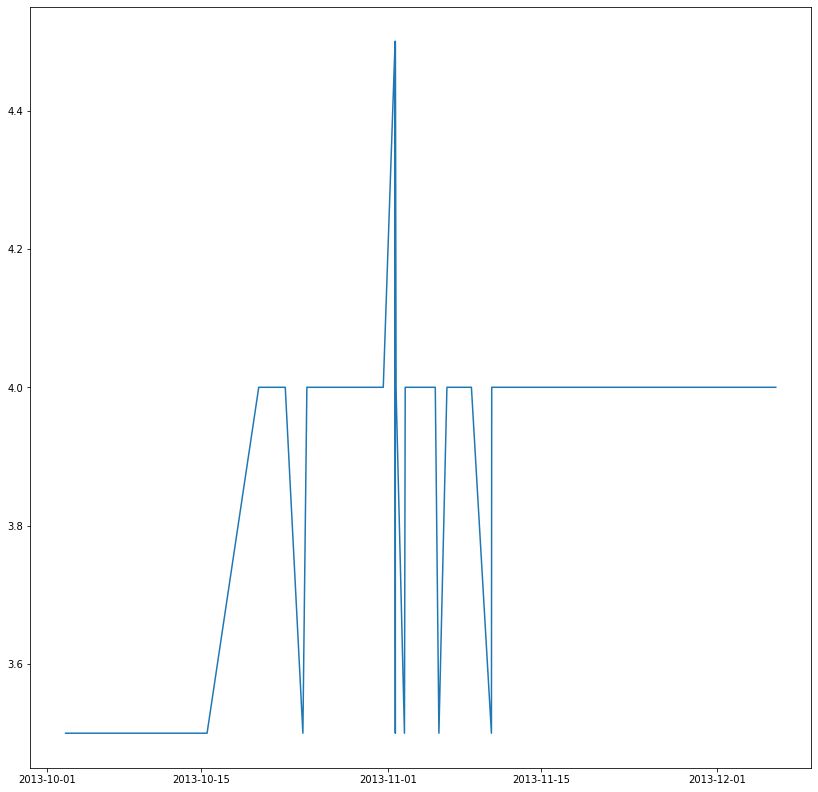

In [ ]:
plt.figure(figsize = (14,14))

plt.plot(time_data.created_at, time_data.Confusion)

In [ ]:
frequency_of_posts_average = np.mean(og_data.forum_uid.value_counts().values)

In [ ]:
print("Average frequency:", frequency_of_posts_average)

Average frequency: 2.679315341423655


In [ ]:
random_sample = og_data.forum_uid.value_counts().sample(300)
# data[data['forum_uid'].isin(random_sample)].groupby(by = 'forum_uid')

In [ ]:

max_val = og_data.forum_uid.value_counts()[0]
min_val = og_data.forum_uid.value_counts()[-1]
plt.figure(figsize = (15, 15))
plt.scatter(random_sample.index.astype(str), random_sample.values)
plt.scatter('max', max_val)
plt.scatter('min', min_val)
plt.axhline(y = frequency_of_posts_average, color = 'r', linestyle = '-')
plt.show()

KeyError: ignored

There are many many people who post below average. Average frequency of posts is around 2.68 ~ 3.
The outliers and frequent posters lie mostly above the average line.

In [ ]:
og_data.describe()

In [ ]:
og_data.forum_uid.value_counts().describe()

## Relationship between confusion and sentiment

In [ ]:
conf_urgency = pd.crosstab(og_data.Confusion, og_data.Urgency)

In [ ]:
conf_urgency

## Relationship between sentiment and urgency

In [ ]:
sent_urgency = pd.crosstab(og_data.Sentiment, og_data.Urgency)

In [ ]:
sent_urgency

## Relationship between Sentiment and Confusion

In [ ]:
conf_sent = pd.crosstab(og_data.Confusion, og_data.Sentiment)
conf_sent


# Topic Modeling on Key Confusion Points

In [ ]:
!wget https://raw.githubusercontent.com/anjali-rgpt/MediaSum-StackExchange-Dialogue-Analysis/main/preprocess.py

In [ ]:
from preprocess import create_pipeline

In [ ]:
questions = og_data.loc[og_data['Question'] == 1]
questions.dropna(how = 'any', axis = 0, inplace = True)
questions = questions.reset_index()
# print(questions.isnull().sum())
print(questions['Text'].values.shape == questions['created_at'].values.shape)

In [ ]:
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

lemmatizer_model = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])
pos_tags = ['NN', 'VB', 'JJ']
stopword_eng = stopwords.words('english')
contractions_dict = {"aren t" : "are not", "can t" : "cannot", "couldnt":"could not", "couldn t" : "could not", "didn t" : "did not", "doesn t" : "does not", "don t" : "do not", "haven t" : "have not", "hasn t" : "has not" , "hadn t" : "had not", "i m" : "i am", "i ve" : "i have", "isn t" : "is not", "it's" : "it is" , "mustn t" : "must not", "shouldn t" : "should not", "wasn t" : "was not", "weren t" : "were not", "wouldn t" : "would not", "won t":"will not", "you re" : "you are", "you ll" : "you will" , "we ll" : "we will", "you ve" : "you have", "we ve" : "we have"}

In [ ]:
preprocessed_questions = questions['Text'].apply(lambda x: ' '.join(create_pipeline(x, ['norm', 'stop', 'ctrc', 'tags', 'lemm'], lowercase = True, relevant_tags= ['JJ', 'NN', 'VB'], general_category= True, lemmatizer=lemmatizer_model, stopwords=stopword_eng, contractions=contractions_dict )))

In [ ]:
import datetime as dt

questions['created_at'] = pd.to_datetime(questions['created_at'])
questions['created_at'] = questions['created_at'].dt.date

In [ ]:
questions.head()

In [ ]:
preprocessed_questions

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install bertopic[use]

In [ ]:
from bertopic import BERTopic

model = BERTopic(embedding_model = 'all-mpnet-base-v2')
topics, probs = model.fit_transform(preprocessed_questions)

In [ ]:
for topic in model.get_topic_info()['Name']:
  print(topic)


In [ ]:
questions['Confusion']

In [ ]:

topics_over_time = model.topics_over_time(questions['Text'].values, questions['created_at'].values)
model.visualize_topics_over_time(topics_over_time, topics = [3, 5, 8, 10, 22] )

The above is a topic distribution across the entire data. For course-specific data, see below.

In [ ]:
!pip install -U kaleido

In [ ]:
mapping = {course:None for course in og_data.course_display_name.unique()}
print(mapping.keys())
for course in mapping.keys():
  try:
    if course != np.nan:
      print("Course:", course)
      subset_qns = questions.loc[questions['course_display_name'] == course][questions['Confusion'] > 4].reset_index()
      # print("YO")
      # print(subset_qns.head())
      timestamps = subset_qns['created_at']
      preprocessed = subset_qns['Text'].apply(lambda x: ' '.join(create_pipeline(x, ['norm', 'ctrc', 'tags', 'lemm', 'stop'], lowercase = False, relevant_tags= ['JJ', 'NN', 'VB'], general_category= True, lemmatizer=lemmatizer_model, stopwords = stopword_eng, contractions=contractions_dict )))
      # print(preprocessed)
      model = BERTopic(embedding_model = 'all-mpnet-base-v2')
      topics, probs = model.fit_transform(list(preprocessed))
      fig2 = model.visualize_hierarchy(hierarchical_topics = model.hierarchical_topics(subset_qns['Text']))
      topics_over_time = model.topics_over_time(subset_qns['Text'].to_list(), timestamps.to_list())
      fig = model.visualize_topics_over_time(topics_over_time)
      print(type(fig))
      fig.write_image(course.replace('/', '_') + ".jpg")
      # fig2.write_image(course.split('/').join('_') + "_hierarchy.jpg")
  except:
    print("K")




In [ ]:
admin_stopwords = ['wrong', 'blank screen', 'certificate', 'accomplishment', 'deadline', 'correct', 'post', 'piazza', 'week', 'day', 'screen', 'laptop', 'name', 'course', 'confused', 'quiz', 'homework', 'final', 'submit', 'slide', 'midterm', 'video', 'exam', 'lecture', 'thank', 'session']

In [ ]:
admin_list = []
questions = og_data.loc[og_data['Question'] == 1]
print(questions.shape)
for string in questions['Text']:
  # print(string)
  try:
    for word in string.split():
      if word in admin_stopwords:
        #print("admin")
        admin_list.append(1)
        break
      else:
        continue
    else:
      #print("Non admin")
      admin_list.append(0)
  except:
    #print("Error")
    admin_list.append(-1)
og_data.loc[questions.index, 'is_admin'] = admin_list
print(og_data['is_admin'].isnull().sum())
print(og_data.loc[2, 'is_admin'])
og_data['is_admin'] = og_data['is_admin'].fillna(-1)


In [ ]:
og_data['is_admin'].value_counts()

In [ ]:
og_data.loc[og_data['is_admin'] == 0]['Text'].sample(5).values

# Survey Questions

In [ ]:
data = pd.read_csv('nonadmin.csv')

In [ ]:
data.head()

In [ ]:
data.course_display_name.value_counts()

In [ ]:
to_drop = ["HumanitiesSciences/Econ-1/Summer2014" ,
"GlobalHealth/WomensHealth/Winter2014",
"HumanitiesScience/Stats216/Winter2014",
"Medicine/SURG210/Managing_Emergencies_What_Every_Doctor_Must_Know",
"HumanitiesSciences/Econ1V/Summer2014"]

In [ ]:
data.drop(data.loc[data['course_display_name'].isin(to_drop)].index, inplace = True, axis = 0)

In [ ]:
data.to_csv('selected_course_questions_to_sample.csv')